In [1]:
# Install the statsmodels package


from statsmodels.tsa.ar_model import AutoReg # AR model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,median_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
data = pd.read_parquet("data/oil_stocks_cleaned.parquet")

<Axes: xlabel='Date'>

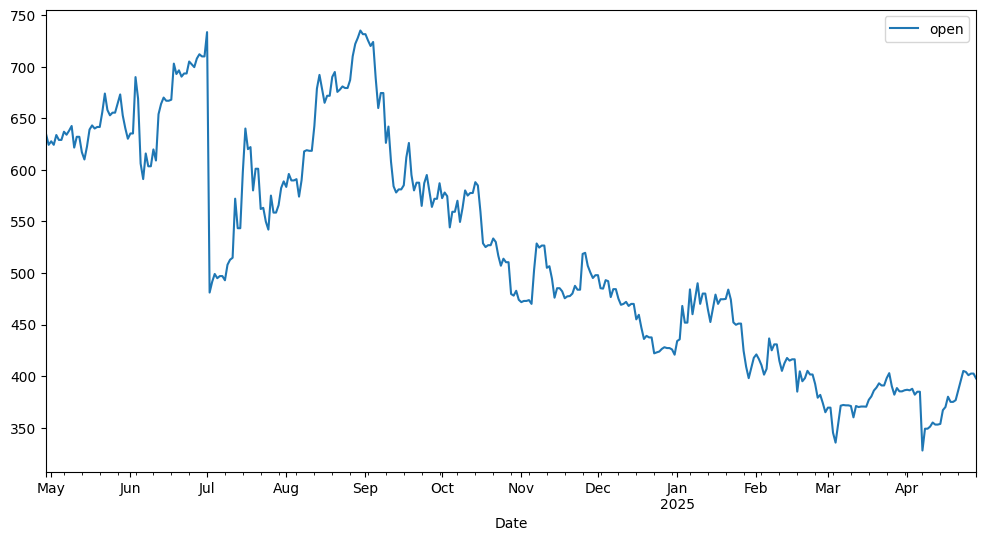

In [3]:
data.plot(figsize=(12, 6))

In [6]:
test_per = 35

train_data = data[:-int(len(data) * test_per/100)]

In [7]:
test_data =     data[-int(len(data) * test_per/100):]

### Auto regression model AR model

In [28]:
lags = 60
model = AutoReg(train_data,lags=lags) # AutoRegressive model past lags values
model_fit = model.fit()

In [29]:
predictions = model_fit.predict(
    start = len(train_data),
    end = len(train_data) +len(test_data)-1,
    dynamic=False
)

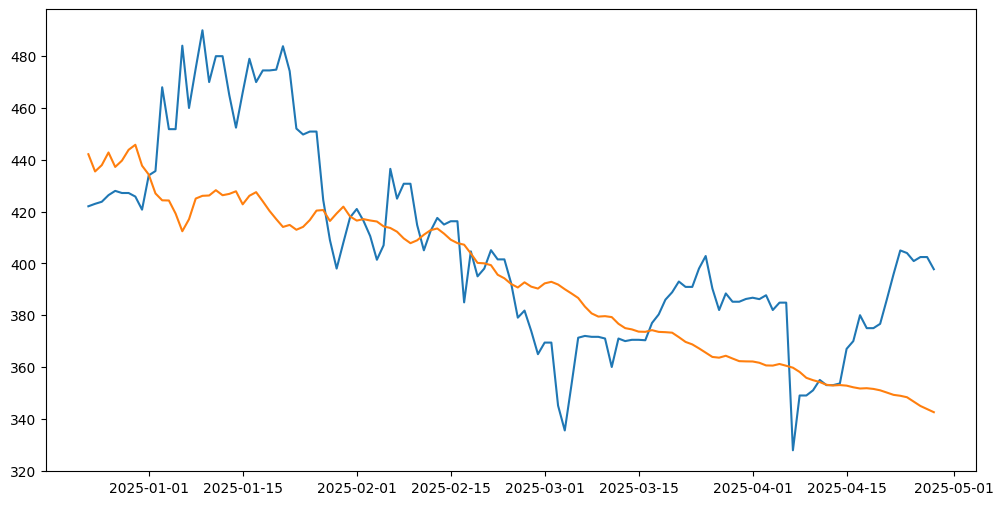

In [30]:
plt.figure(figsize=(12,6))
plt.plot(test_data.index,test_data,label='Test-data')
plt.plot(test_data.index,predictions,label='predictions')

In [31]:
mean_squared_error(test_data, predictions)

855.7526351733703

In [12]:
np.sqrt(mean_squared_error(test_data, predictions))

np.float64(29.25324999334895)

In [17]:
median_absolute_error(test_data, predictions)

np.float64(21.108711289542384)

In [15]:
mean_absolute_percentage_error(test_data, predictions) *100

5.501994845180059

### Moving average MV model (0,0,q)

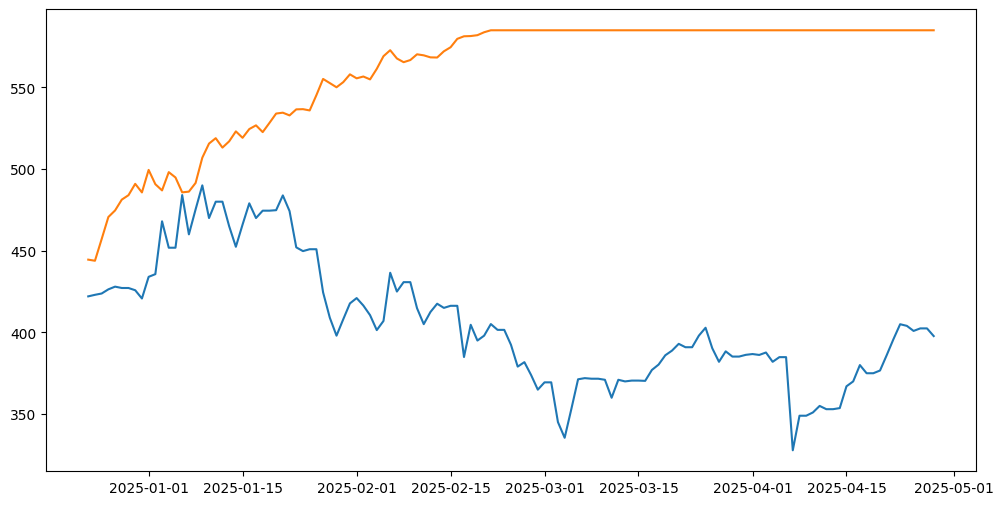

In [47]:
q = 60 # Error term taking into account
model = ARIMA(train_data, order=(0,0,q))
model_fit = model.fit()
predictions = model_fit.predict(
    start = len(train_data),
    end = len(train_data) +len(test_data)-1,
    dynamic=False
)
plt.figure(figsize=(12,6))
plt.plot(test_data.index,test_data,label='Test-data')
plt.plot(test_data.index,predictions,label='predictions')


In [23]:
mean_squared_error(test_data, predictions)

29210.611275647192

In [24]:
mean_absolute_percentage_error(test_data, predictions) *100

39.832925811267344

### ARMA model autoregression moving average model

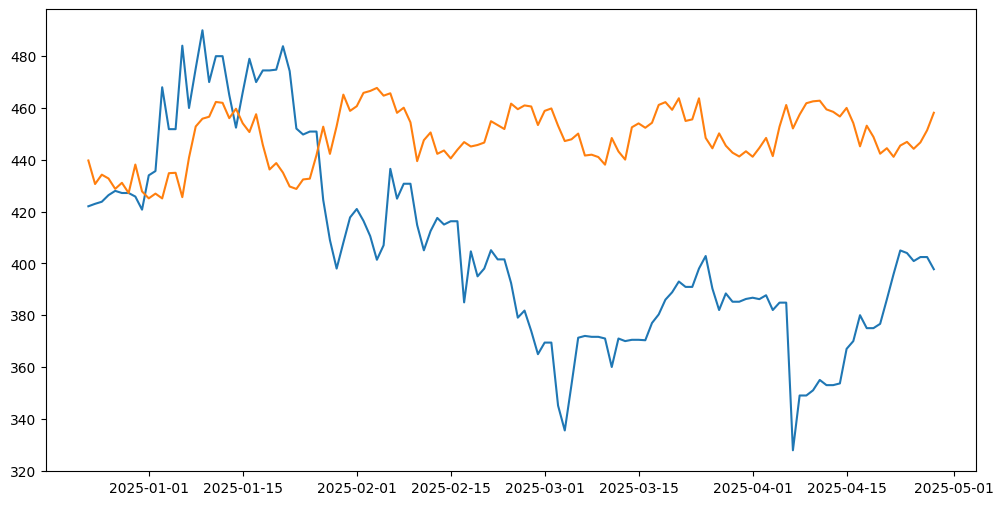

In [52]:
### ARMA model 
p = 60 # Error term taking into account
q = 15 # Error term taking into account
model = ARIMA(train_data, order=(p,0,q))
model_fit = model.fit()
predictions = model_fit.predict(
    start = len(train_data),
    end = len(train_data) +len(test_data)-1,
    dynamic=False
)

plt.figure(figsize=(12,6))
plt.plot(test_data.index,test_data,label='Test-data')
plt.plot(test_data.index,predictions,label='predictions')

In [53]:
mean_squared_error(test_data, predictions)

3607.671281096426

### ARIMA model 

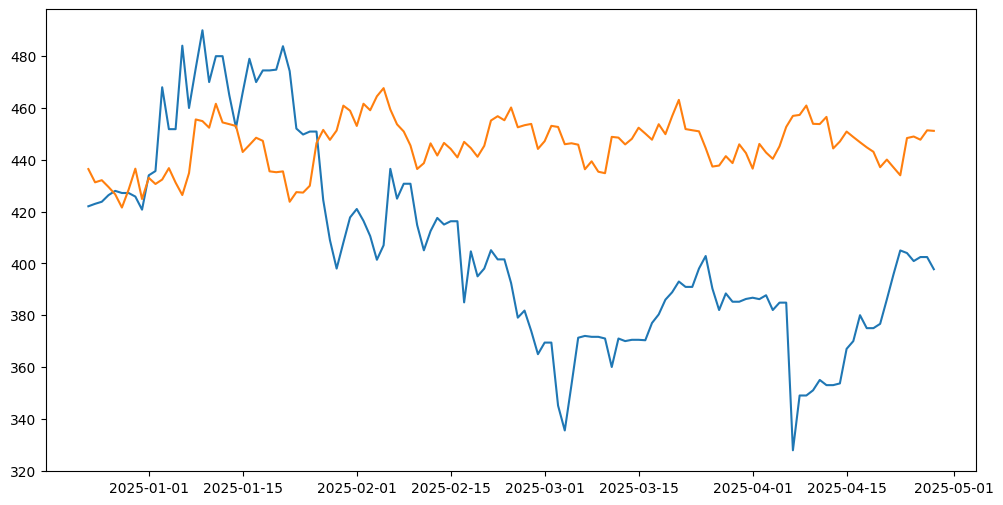

In [54]:
### ARMA model 
p = 60 # lag term taking into account
q = 15 # Error term taking into account
model = ARIMA(train_data, order=(p,1,q))
model_fit = model.fit()
predictions = model_fit.predict(
    start = len(train_data),
    end = len(train_data) +len(test_data)-1,
    dynamic=False
)

plt.figure(figsize=(12,6))
plt.plot(test_data.index,test_data,label='Test-data')
plt.plot(test_data.index,predictions,label='predictions')

In [55]:
mean_squared_error(test_data, predictions)

3279.4042027180863

6381.813575781169


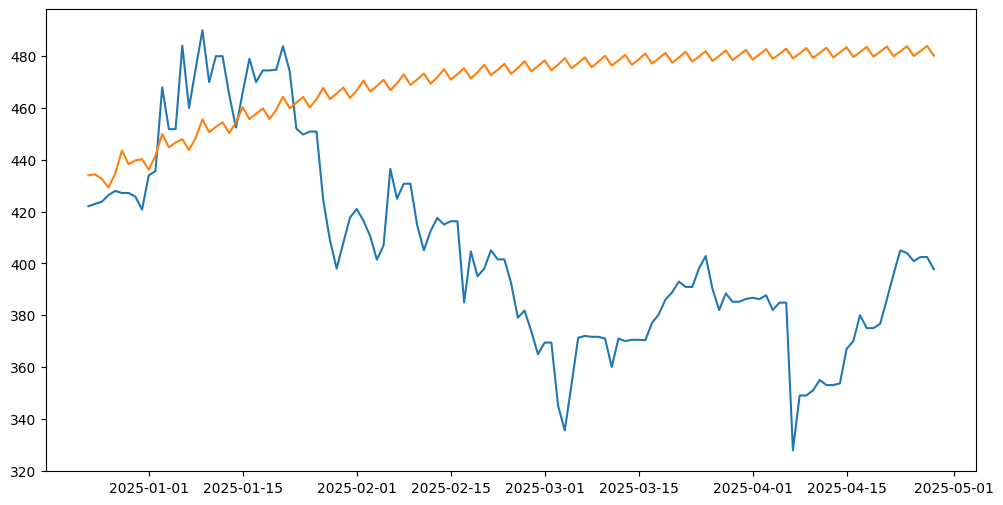

In [85]:
p,d,q, = 2,0,2 # lag term taking into account
P,D,Q,s = 4,1,2,3
model = SARIMAX(train_data, order=(p,d,q), seasonal_order=(P,D,Q,s))
model_fit = model.fit()
predictions = model_fit.predict(
    start = len(train_data),
    end = len(train_data) +len(test_data)-1,
    dynamic=False
)
plt.figure(figsize=(12,6))
plt.plot(test_data.index,test_data,label='Test-data')
plt.plot(test_data.index,predictions,label='predictions')
print(mean_squared_error(test_data, predictions))

# Multivariate

In [3]:
vector_df = pd.read_parquet("data/vector_df.parquet")

In [ ]:
vector_df['random'] = np.random.randn(len(vector_df))

In [ ]:
### Granger causality test
grangercausalitytests(vector_df[["open","random"]], maxlag=5, verbose=True)

In [ ]:
### Granger causality test
grangercausalitytests(vector_df[["open","high"]], maxlag=5, verbose=True)

<Axes: xlabel='Date'>

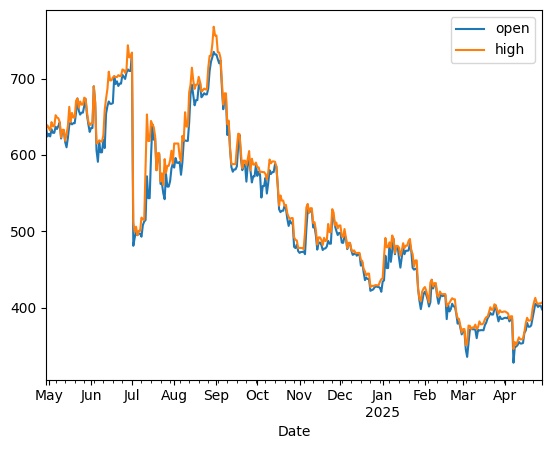

In [13]:
# By using the Granger causality test, F is between 0 -100 and if F is greater than 20 or more, it have impact and correlated somewhere, and p-value is between 0-1, if p-value is less than 0.05, it is significant.

vector_df[["open","high"]].plot()

<Axes: xlabel='Date'>

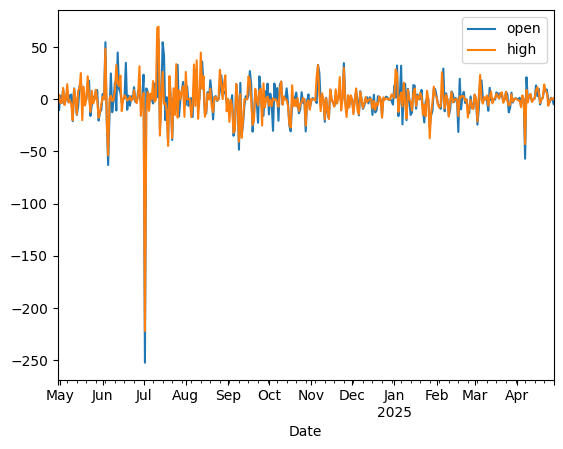

In [14]:
vector_df[["open","high"]].diff().plot()

<Axes: xlabel='Date'>

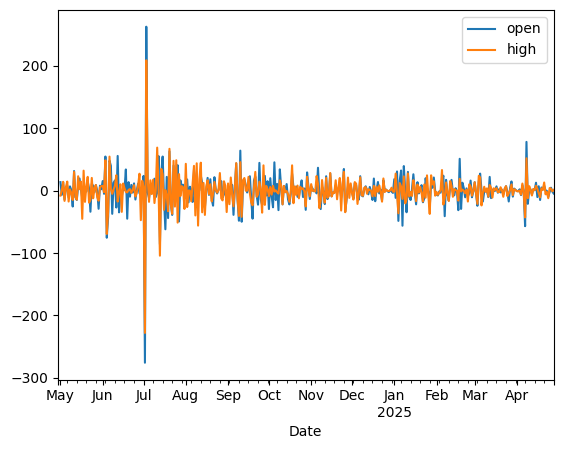

In [15]:
vector_df[["open","high"]].diff().diff().plot()

In [16]:
data = vector_df[["open","high"]]
train_data, test_data = data[:-35], data[-35:]

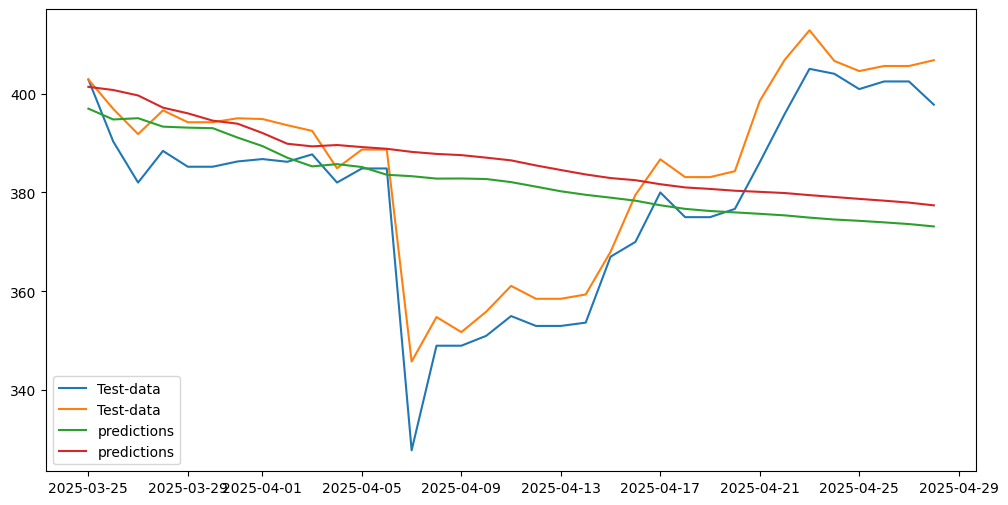

419.70619721828126


4.1008600329310525

In [22]:
# VAR model
from statsmodels.tsa.api import VAR
model = VAR(train_data)
model_fit = model.fit(maxlags=20, ic='aic')
predictions = model_fit.forecast(train_data.values[-model_fit.k_ar:], steps=len(test_data))
plt.figure(figsize=(12,6))
plt.plot(test_data.index,test_data,label='Test-data')
plt.plot(test_data.index,predictions,label='predictions')
plt.legend()
plt.show()
print(mean_squared_error(test_data, predictions))
mean_absolute_percentage_error(test_data, predictions) *100

In [6]:
train_data

,open,high
Date,,
2024-04-30,-10.200,4.250000
2024-05-01,3.400,-3.683333
2024-05-02,-3.400,-3.116667
2024-05-03,9.500,11.000000
2024-05-04,-4.750,-5.500000
...,...,...
2025-03-20,2.850,5.900000
2025-03-21,4.150,6.600000
2025-03-22,-2.075,-3.300000


In [8]:
test_data["high"] + vector_df["high"][-35:]

Date
2025-03-25    401.300000
2025-03-26    390.950000
2025-03-27    386.700000
2025-03-28    401.400000
2025-03-29    391.800000
2025-03-30    394.200000
2025-03-31    395.800000
2025-04-01    394.700000
2025-04-02    392.350000
2025-04-03    391.300000
2025-04-04    377.350000
2025-04-05    392.450000
2025-04-06    388.675000
2025-04-07    302.925000
2025-04-08    363.800000
2025-04-09    348.700000
2025-04-10    360.016667
2025-04-11    366.316667
2025-04-12    355.883333
2025-04-13    358.491667
2025-04-14    360.230556
2025-04-15    376.638889
2025-04-16    391.000000
2025-04-17    393.900000
2025-04-18    379.500000
2025-04-19    383.100000
2025-04-20    385.500000
2025-04-21    412.700000
2025-04-22    415.100000
2025-04-23    418.800000
2025-04-24    400.400000
2025-04-25    402.500000
2025-04-26    406.600000
2025-04-27    405.575000
2025-04-28    407.925000
Name: high, dtype: float64

In [15]:
vector_df["high"].shift(1) + train_data["high"]

Date
2024-04-29           NaN
2024-04-30    638.800000
2024-05-01    635.116667
2024-05-02    632.000000
2024-05-03    643.000000
                 ...    
2025-04-24           NaN
2025-04-25           NaN
2025-04-26           NaN
2025-04-27           NaN
2025-04-28           NaN
Name: high, Length: 365, dtype: float64

In [ ]:
predictions = model_fit.forecast(train_data.values[-model_fit.k_ar:], steps=len(test_data))
plt.figure(figsize=(12,6))
plt.plot(test_data.index,test_data,label='Test-data')
plt.plot(test_data.index,predictions,label='predictions')
plt.legend()
plt.show()
print(mean_squared_error(test_data, predictions))
mean_absolute_percentage_error(test_data, predictions) *100